# Notebook to compute the CAI index

Input: 
 - < cycle_order.csv> the file with the list of cycles and their labels

Output: 
- the CAI index plot

In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import pickle
import sys

ParentPath = str(pathlib.Path().absolute().parent)

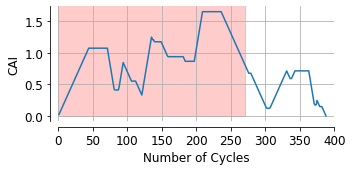

In [5]:
#Read file with cycle order and cycle label
file_label = pd.read_csv(ParentPath+'/data/cycle_order.csv', sep=",")

PG = []
PY = []
PR = []

G = 0
Y = 0
R = 0

NG = float(len(file_label[file_label['label']=="green"]))
NY = float(len(file_label[file_label['label']=="yellow"]))
NR = float(len(file_label[file_label['label']=="red"]))

for index, row in file_label.iterrows():
    if(row['label']=="green"): G+=1
    if(row['label']=="yellow"): Y+=1
    if(row['label']=="red"): R+=1
    
    PG.append(G/NG*100)
    PY.append(Y/NY*100)
    PR.append(R/NR*100)
    
CAI = []
CAI.append(np.NaN)
for i in range(len(PG)):
    values = [PG[i],PY[i],PR[i]]
    cumdiff = 0
    for j in range(len(values)):
        for k in range(len(values)):
            cumdiff+= abs(values[j]-values[k])
    
    CAI.append(cumdiff)
        

fig, ax = plt.subplots(figsize=(5,2.5))
ax.plot([CAI[i]/100 for i in range(len(CAI))])

rect = patches.Rectangle((0,0),270,4,linewidth=1,edgecolor='r',facecolor='red', alpha=0.2)
ax.add_patch(rect)

plt.grid()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.03))

ax.set_ylabel("CAI",fontsize=12)
ax.set_xlabel("Number of Cycles",fontsize=12)
ax.set_xlim(0,400)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
plt.close()        